In [2]:
# importing libraries
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import numpy             as np
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler

# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO                             # saves objects in memory
from IPython.display import Image                    # displays on frontend
#import pydotplus                                     # interprets dot objects


# new packages
from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

# loading data
apprentice = pd.read_excel( io = './Apprentice_Chef_Dataset.xlsx' )

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# User defined functions

In [2]:
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [3]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [4]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

# Feature Engineering

In [5]:
### Checking Correlations with original dataset variables ###

df_corr = apprentice.corr(method='pearson').round(decimals=2)
df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
CANCELLATIONS_BEFORE_NOON      0.16
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
PC_LOGINS                      0.04
MASTER_CLASSES_ATTENDED        0.04
PACKAGE_LOCKER                 0.04
CONTACTS_W_CUSTOMER_SERVICE    0.04
MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME              0.03
LARGEST_ORDER_SIZE             0.02
EARLY_DELIVERIES               0.02
TOTAL_MEALS_ORDERED            0.01
AVG_TIME_PER_SITE_VISIT        0.01
TOTAL_PHOTOS_VIEWED            0.01
LATE_DELIVERIES                0.01
PRODUCT_CATEGORIES_VIEWED      0.00
UNIQUE_MEALS_PURCH             0.00
REVENUE                        0.00
WEEKLY_PLAN                   -0.01
AVG_CLICKS_PER_VISIT          -0.04
CANCELLATIONS_AFTER_NOON      -0.05
MOBILE_LOGINS                 -0.05
Name: CROSS_SELL_SUCCESS, dtype: float64

In [6]:
### log transformations of all numeric variables ###

success = apprentice['CROSS_SELL_SUCCESS']

# Loop to create log-transformations of all numeric (non-binary) variables
for i in range(len(df_corr)):
    name = df_corr.index[i]
    name_new = 'log_' + df_corr.index[i]
    
    if apprentice[name].nunique() != 2:
        apprentice[name_new] = np.log10(apprentice[name]) # Adding log-transformed variable to dataset
    
        a = apprentice[name]
        b = apprentice[name_new]
        
        corr_a = success.corr(a)
        corr_b = success.corr(b)
        
        if abs(corr_b) > abs(corr_a): 
            print(name_new + ' +')
            
        else:
            apprentice = apprentice.drop(name_new,axis=1) # If log-transformed variable doesn't have better correlation it's dropped
        

   
    


log_REVENUE +
log_TOTAL_MEALS_ORDERED +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_AVG_TIME_PER_SITE_VISIT +
log_PC_LOGINS +
log_AVG_PREP_VID_TIME +
log_LARGEST_ORDER_SIZE +


/Users/martinsandberg/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
# Checking correlations with new variables

df_corr = apprentice.corr(method='pearson').round(decimals=2)
df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS                 1.00
CANCELLATIONS_BEFORE_NOON          0.16
MOBILE_NUMBER                      0.10
TASTES_AND_PREFERENCES             0.08
REFRIGERATED_LOCKER                0.07
log_PC_LOGINS                      0.05
log_CONTACTS_W_CUSTOMER_SERVICE    0.05
PC_LOGINS                          0.04
CONTACTS_W_CUSTOMER_SERVICE        0.04
PACKAGE_LOCKER                     0.04
MASTER_CLASSES_ATTENDED            0.04
AVG_PREP_VID_TIME                  0.03
log_AVG_PREP_VID_TIME              0.03
log_LARGEST_ORDER_SIZE             0.03
MEDIAN_MEAL_RATING                 0.03
LARGEST_ORDER_SIZE                 0.02
EARLY_DELIVERIES                   0.02
log_TOTAL_MEALS_ORDERED            0.02
log_AVG_TIME_PER_SITE_VISIT        0.02
AVG_TIME_PER_SITE_VISIT            0.01
TOTAL_MEALS_ORDERED                0.01
LATE_DELIVERIES                    0.01
TOTAL_PHOTOS_VIEWED                0.01
log_REVENUE                        0.01
log_UNIQUE_MEALS_PURCH             0.01


In [8]:
apprentice['mobile_app'] = 0
apprentice.loc[apprentice.MOBILE_LOGINS > 0, 'mobile_app'] = 1

In [9]:
apprentice['above_10_cust_complaints'] = 0
apprentice.loc[apprentice.CONTACTS_W_CUSTOMER_SERVICE > 10, 'above_10_cust_complaints'] = 1

In [10]:
### Number of Names feature ###

# calling text_split_feature
text_split_feature('NAME',apprentice)


# checking results
apprentice['number_of_names']

0       1
1       2
2       2
3       2
4       2
       ..
1941    2
1942    2
1943    2
1944    1
1945    2
Name: number_of_names, Length: 1946, dtype: int64

In [11]:
### engaged vs not engaged customer ###
apprentice['engaged'] = 0
apprentice['engaged_2'] = 0
apprentice['not_engaged'] = 0

for index, value in apprentice.iterrows():
    
    if (apprentice.loc[index,'MASTER_CLASSES_ATTENDED'] > 0) and \
    (apprentice.loc[index,'TASTES_AND_PREFERENCES'] > 0) and \
    (apprentice.loc[index,'WEEKLY_PLAN'] > 0):
        apprentice.loc[index,'engaged_2'] = 1
        
    elif (apprentice.loc[index,'MASTER_CLASSES_ATTENDED'] > 0) or \
    (apprentice.loc[index,'TASTES_AND_PREFERENCES'] > 0) or \
    (apprentice.loc[index,'WEEKLY_PLAN'] > 0):
        apprentice.loc[index,'engaged'] = 1
        
    else:
        apprentice.loc[index,'not_engaged'] = 1 


In [12]:
### EMAIL ADDRESSES ###

# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

# email domain types
personal_email_domains = ['gmail.com','protonmail.com','yahoo.com']

# Junk domains
junk_email_domains = ['me.com','aol.com','hotmail.com','live.com','msn.com','passport.com']

# placeholder list
placeholder_lst = []

# looping to group observations by domain type
for domain in email_df.iloc[:,1]:
        if domain in personal_email_domains:
            placeholder_lst.append('personal')
        elif domain in junk_email_domains:
            placeholder_lst.append('junk')
        else:
            placeholder_lst.append('company')


# concatenating with original DataFrame
apprentice['domain_group'] = pd.Series(placeholder_lst)

one_hot_domain = pd.get_dummies(apprentice['domain_group'])
apprentice = apprentice.join(one_hot_domain)
apprentice = apprentice.drop('domain_group', axis=1)

# Feature Sets

In [13]:
####################
### Feature sets ###
####################

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                   'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT','MOBILE_NUMBER',
                   'CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON','TASTES_AND_PREFERENCES',
                   'PC_LOGINS','MOBILE_LOGINS','WEEKLY_PLAN','EARLY_DELIVERIES','LATE_DELIVERIES',
                   'PACKAGE_LOCKER','REFRIGERATED_LOCKER','AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE',
                   'MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING','AVG_CLICKS_PER_VISIT',
                   'TOTAL_PHOTOS_VIEWED','log_REVENUE','log_TOTAL_MEALS_ORDERED','log_UNIQUE_MEALS_PURCH',
                   'log_CONTACTS_W_CUSTOMER_SERVICE','log_AVG_TIME_PER_SITE_VISIT','log_PC_LOGINS',
                   'log_AVG_PREP_VID_TIME','log_LARGEST_ORDER_SIZE','company','junk',
                   'engaged','engaged_2','number_of_names'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON',
                   'TASTES_AND_PREFERENCES','EARLY_DELIVERIES','LATE_DELIVERIES','REFRIGERATED_LOCKER',
                   'MEDIAN_MEAL_RATING','log_REVENUE','log_TOTAL_MEALS_ORDERED','log_PC_LOGINS',
                   'company','junk','engaged','engaged_2','number_of_names'],
    
 # significant variables only (set 2)
 'logit_best_logreg'  : ['MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON','TASTES_AND_PREFERENCES',
                      'personal','junk','log_CONTACTS_W_CUSTOMER_SERVICE','engaged_2',
                      'number_of_names','mobile_app'],
 
 # best tree variables only (set 2)   
 'best_tree'          : ['MOBILE_NUMBER','CANCELLATIONS_BEFORE_NOON','TASTES_AND_PREFERENCES',
                      'personal','junk','log_CONTACTS_W_CUSTOMER_SERVICE','engaged_2',
                      'number_of_names'],
    
}
 

# Models

In [14]:
################################################
### scikit-learn models, creating dataframes ###
################################################
# train/test split with the full model
apprentice_data = apprentice.loc[:,candidate_dict['logit_full']]
apprentice_target = apprentice.loc[:,'CROSS_SELL_SUCCESS']

# train/test split with significant variables
apprentice_data_sig = apprentice.loc[:,candidate_dict['logit_sig']]

# train/test split with best logistic regression variables
apprentice_data_best_logreg = apprentice.loc[:,candidate_dict['logit_best_logreg']]

# train/test split with best tree variables
apprentice_data_best_tree = apprentice.loc[:,candidate_dict['best_tree']]

In [15]:
##########################
### Preparing datasets ###
##########################

# data for full dataset
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = apprentice_target)

# data for logistic regression 
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(
            apprentice_data_best_logreg,
            apprentice_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = apprentice_target)

# data for logistic regression 
x_train_tree, x_test_tree, y_train_tree, y_test_tree = train_test_split(
            apprentice_data_best_tree,
            apprentice_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = apprentice_target)

## Logistic Regressions

In [16]:
####################
### Full Dataset ###
####################

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)

# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()

# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)



Training ACCURACY: 0.6909
Testing  ACCURACY: 0.6797


/Users/martinsandberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
###########################
### Significant Dataset ###
###########################

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)

# FITTING the training data
logreg_fit = logreg.fit(x_train_log, y_train_log)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test_log)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train_log, y_train_log).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test_log, y_test_log).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train_log, y_train_log).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test_log, y_test_log).round(4) # accuracy


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test_log,
                                 y_score = logreg_pred).round(decimals = 4)


# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test_log, y_pred = logreg_pred).ravel()

    


Training ACCURACY: 0.7279
Testing  ACCURACY: 0.7392


## Classification Trees (CART Models)

In [18]:
##########################################
### Classification Trees (CART Models) ###
##########################################

# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus 

In [19]:
#################
### Full Tree ###
#################

# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train_log, y_train_log)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test_log)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train_log,
                                                    y_train_log).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test_log,
                                                    y_test_log).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test_log,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train_log, y_train_log).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test_log, y_test_log).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test_log,
                                      y_score = full_tree_pred).round(4) # auc

# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()



Full Tree Training ACCURACY: 0.8725
Full Tree Testing ACCURACY : 0.6838
Full Tree AUC Score: 0.6403


In [20]:
###################
### Pruned Tree ###
###################

# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 4,
                    min_samples_split = 25,
                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train_tree, y_train_tree)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(x_test_tree)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train_tree, y_train_tree).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test_tree, y_test_tree).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_tree,
                                          y_score = tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train_tree, y_train_tree).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test_tree, y_test_tree).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test_tree,
                                        y_score = tree_pred).round(4) # auc

# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test_tree, y_pred = tree_pred).ravel()

Training ACCURACY: 0.7539
Testing  ACCURACY: 0.7762
AUC Score        : 0.7133


## KNN

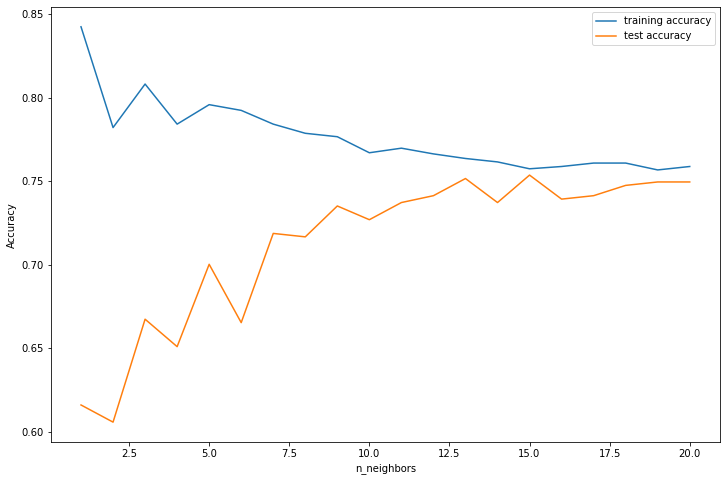

The optimal number of neighbors is: 15


In [21]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(apprentice_data_best_logreg,apprentice_target,response_type='class')

In [22]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(apprentice_data_best_logreg)


# TRANSFORMING the data
x_scaled     = scaler.transform(apprentice_data_best_logreg)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 

# adding labels to the scaled DataFrame
x_scaled_df.columns = apprentice_data_best_logreg.columns

# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(
            x_scaled_df,
            apprentice_target,
            random_state = 219,
            test_size = 0.25,
            stratify = apprentice_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors=15)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test).round(4)


# SCORING the results
print('Training ACCURACY:', knn_train_score.round(4))
print('Testing  ACCURACY:', knn_test_score.round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                y_score = knn_pred).round(4)

# unpacking the confusion matrix
knn_tn, \
knn_fp, \
knn_fn, \
knn_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


Training ACCURACY: 0.7553
Testing  ACCURACY: 0.7454
AUC Score        : 0.6619


In [23]:
#############################################
### Creating dataframe for first 4 models ###
#############################################

# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree','KNN'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score,knn_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score,knn_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score,knn_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (knn_tn,knn_fp,knn_fn,knn_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

In [24]:
###############################
### HYPERPARAMETER TUNINING ###
###############################

## Tuned Logistic Regression

In [25]:
### RandomizedSearchCV Results ###

# Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 2.7}
# Tuned CV AUC      : 0.6421

In [26]:
################
### lr tuned ###
################

lr_tuned = LogisticRegression(solver = 'newton-cg',
                                C = 2.7,
                                warm_start = True,
                                random_state = 219)

# FITTING the training data
lr_tuned.fit(x_train_log, y_train_log)

# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test_log)

# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train_log, y_train_log).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test_log, y_test_log).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_log,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train_log, y_train_log).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test_log, y_test_log).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test_log,
                                     y_score = lr_tuned_pred).round(4) # auc

# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train_log, y_train_log).round(4)
lr_test_acc  = lr_tuned.score(x_test_log, y_test_log).round(4)
lr_auc       = roc_auc_score(y_true  = y_test_log,
                             y_score = lr_tuned_pred).round(4)

# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'             : 'Tuned LR',
                          'Training Accuracy'  : lr_train_acc,
                          'Testing Accuracy'   : lr_test_acc,
                          'AUC Score'          : lr_auc,
                          'Confusion Matrix'   : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                          ignore_index = True)

Training ACCURACY: 0.7286
Testing  ACCURACY: 0.7433
AUC Score        : 0.6485


## Tuned Classification trees

In [27]:
### RandomizedSearchCV Results ###

# Tuned Decision Tree Parameters: {'splitter': 'best', 'min_samples_leaf': 4, 'max_depth': 3, 'criterion': 'gini'}
# Best score is 0.7031819897084047

In [28]:
# INSTANTIATING a classification tree object
tree_tuned = DecisionTreeClassifier(criterion = 'gini',
                                    splitter = 'best',
                                    min_samples_leaf = 4,
                                    max_depth = 3,
                                    random_state = 219)


# FITTING the training data
tree_tuned_fit = tree_tuned.fit(x_train_log, y_train_log)


# PREDICTING on new data
tree_pred = tree_tuned_fit.predict(x_test_log)


# SCORING the model
print('Training ACCURACY:', tree_tuned_fit.score(x_train_log, y_train_log).round(4))
print('Testing  ACCURACY:', tree_tuned_fit.score(x_test_log, y_test_log).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test_log,
                                          y_score = tree_pred).round(4))


# saving scoring data for future use
tuned_tree_train_score = tree_tuned_fit.score(x_train_log, y_train_log).round(4) # accuracy
tuned_tree_test_score  = tree_tuned_fit.score(x_test_log, y_test_log).round(4) # accuracy


# saving auc score
tuned_tree_auc_score   = roc_auc_score(y_true  = y_test_log,
                                        y_score = tree_pred).round(4) # auc

# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test_log, y_pred = lr_tuned_pred).ravel()

# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'             : 'Tuned Tree',
                          'Training Accuracy'  : tuned_tree_train_score,
                          'Testing Accuracy'   : tuned_tree_test_score,
                          'AUC Score'          : tuned_tree_auc_score,
                          'Confusion Matrix'   : (tuned_tree_tn, 
                                                  tuned_tree_fp, 
                                                  tuned_tree_fn, 
                                                  tuned_tree_tp)},
                          ignore_index = True)

Training ACCURACY: 0.7423
Testing  ACCURACY: 0.7721
AUC Score        : 0.7307


In [29]:
# new packages
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

## Random Forest

In [30]:
#####################
### Random Forest ###
#####################

In [31]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [32]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train_log, y_train_log)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test_log)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train_log, y_train_log).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test_log, y_test_log).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test_log,
                                          y_score = rf_default_fit_pred).round(4))

# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test_log, y_pred = rf_default_fit_pred).ravel()

Training ACCURACY: 0.8725
Testing  ACCURACY: 0.7043
AUC Score        : 0.6283


In [33]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train_log, y_train_log).round(4)
rf_test_acc  = rf_default_fit.score(x_test_log, y_test_log).round(4)
rf_auc       = roc_auc_score(y_true  = y_test_log,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


## Tuned Random Forest

In [34]:
### RandomizedSearchCV Results ###

# RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=600,random_state=219, warm_start=True)

In [35]:
# building a model based on hyperparameter tuning results
forest_tuned = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=219,
                       verbose=0, warm_start=True)


# FITTING the model object
forest_tuned_fit = forest_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                   y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()

# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)

Forest Tuned Training ACCURACY: 0.8677
Forest Tuned Testing  ACCURACY: 0.7433
Forest Tuned AUC Score        : 0.6349


## Gradient Boosted Classifier

In [36]:
#################################
### Gradient Boosted Machines ###
#################################

In [37]:
###################
### GBM Default ###
###################

# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()

# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)

Training ACCURACY: 0.8465
Testing ACCURACY : 0.7495
AUC Score        : 0.6717


## Tuned Gradient Booster Classififer

In [38]:
### RandomizedSearchCV Results ###

# Tuned Parameters  : {'warm_start': True, 'n_estimators': 125, 'max_depth': 1, 'learning_rate': 0.7000000000000001}

In [39]:
# building a model based on hyperparameter tuning results
gbm_tuned = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.7000000000000001, loss='deviance',
                           max_depth=1, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=125,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=219, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=True)

# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()

# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)

Training ACCURACY: 0.7999
Testing  ACCURACY: 0.7433
AUC Score        : 0.6638


In [40]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
5,Tuned Tree,0.7307,0.7423,0.7721,"(60, 96, 29, 302)"
2,Pruned Tree,0.7133,0.7539,0.7762,"(84, 72, 37, 294)"
8,GBM (Full),0.6717,0.8465,0.7495,"(71, 85, 37, 294)"
9,Tuned GBM,0.6638,0.7999,0.7433,"(69, 87, 38, 293)"
3,KNN,0.6619,0.7553,0.7454,"(67, 89, 35, 296)"
4,Tuned LR,0.6485,0.7286,0.7433,"(60, 96, 29, 302)"
0,Logistic,0.6421,0.7279,0.7392,"(58, 98, 29, 302)"
1,Full Tree,0.6403,0.8725,0.6838,"(81, 75, 79, 252)"
7,Tuned Random Forest (Full),0.6349,0.8677,0.7433,"(52, 104, 21, 310)"
6,Random Forest (Full),0.6283,0.8725,0.7043,"(65, 91, 53, 278)"


In [41]:
print('Final Model: Tuned Tree')

Final Model: Tuned Tree


In [42]:
# saving the DataFrame to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                           index = False)